In [1]:
import sys
sys.path.append("..") ## resetting the path to the parent directory

In [2]:
from src import data_preparator, plot_helper

In [3]:
%load_ext autoreload
%autoreload 2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
with open('../data/raw_metadata.json') as json_file:
    data = json.load(json_file)

In [5]:
raw_df = pd.DataFrame.from_dict(data)

In [6]:
history = pd.read_csv('../data/vgg_model_history.csv')

In [7]:
predictions = pd.read_csv('../data/predicted_values.csv')

In [8]:
df = pd.read_csv('../data/cleaned_data.csv')

# Images and graphs

## Before balancing data

### Number of coins with emperor's portraits

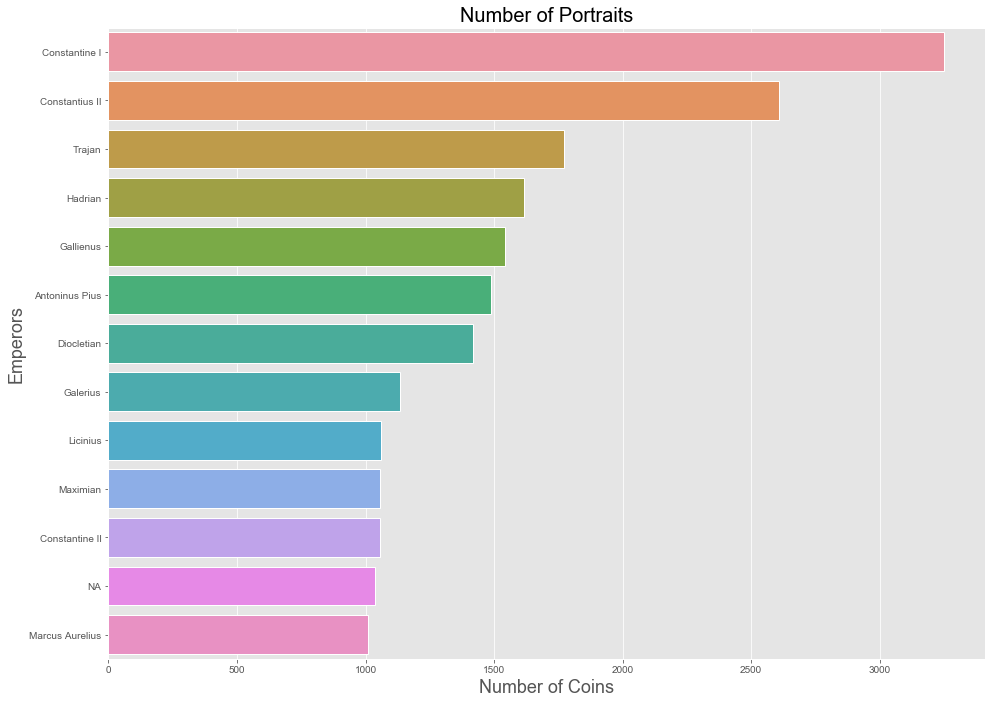

In [9]:
df_temp = raw_df[raw_df.groupby('portrait')['portrait'].transform('size')>1000]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['portrait'].value_counts().index, 
            x = df_temp['portrait'].value_counts(),
            ax = ax);
ax.set_title('Number of Portraits',fontsize=20)
ax.set_ylabel('Emperors',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
ax.set
plt.tight_layout()

## Examining Balanced Data

### Distribution of coins by Roman provinces

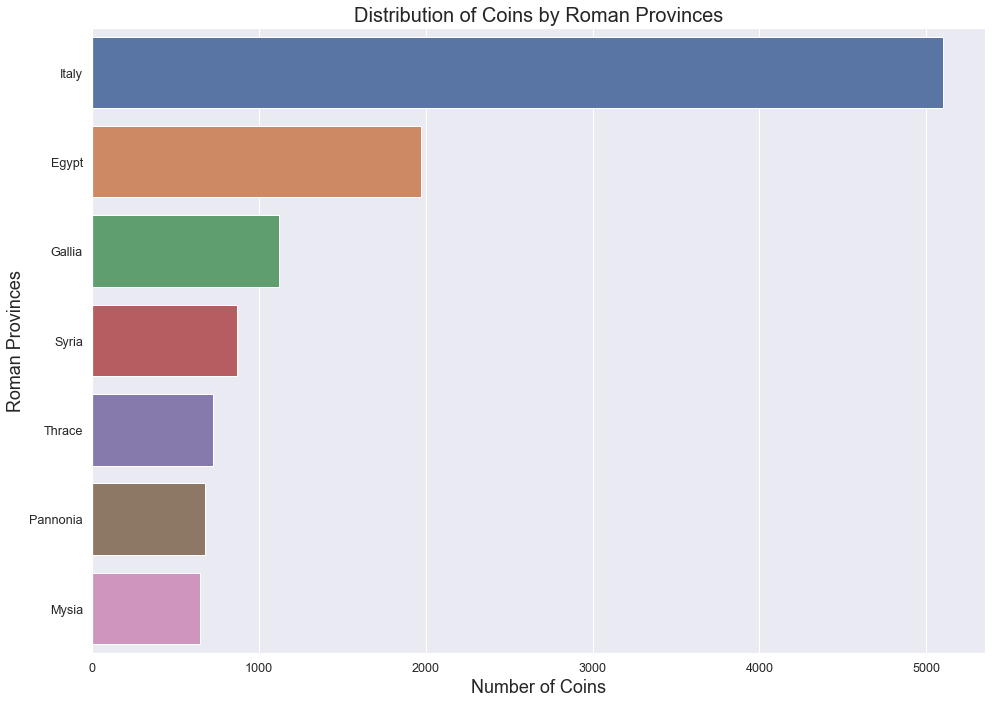

In [10]:
#df_temp = df_target[df_target.groupby('region')['region'].transform('size')>250]
df_temp = df[df.groupby('region')['region'].transform('size')>500]
fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['region'].value_counts().index,
            x = df_temp['region'].value_counts(),
            ax = ax);
ax.set_title('Distribution of Coins by Roman Provinces',fontsize=20)
ax.set_ylabel('Roman Provinces',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
plt.tight_layout()

### Coin materials

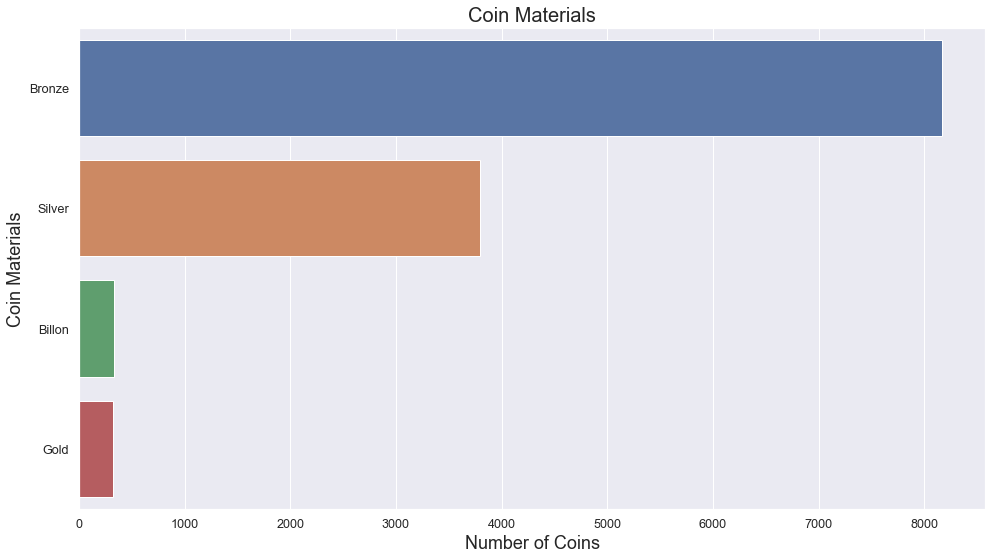

In [17]:
#df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>250]
df_temp = df[df.groupby('material')['material'].transform('size')>200]

fig,ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['material'].value_counts().index,
            x = df_temp['material'].value_counts(),
            ax = ax);
ax.set_title('Coin Materials',fontsize=20)
ax.set_ylabel('Coin Materials',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
plt.tight_layout()

### Distribution of coin denominations

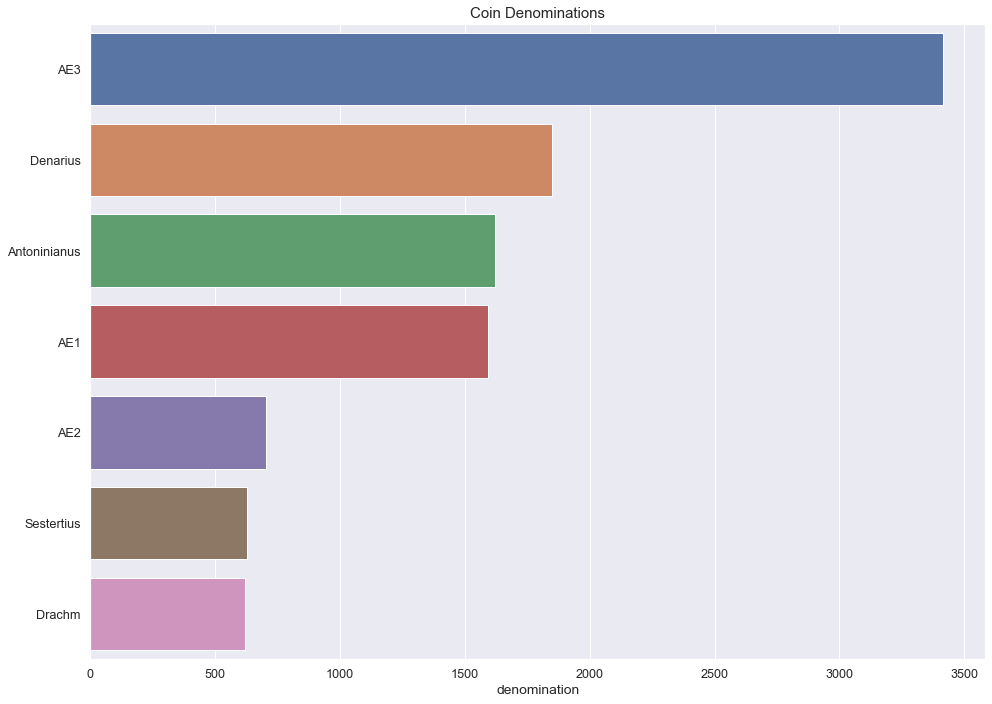

In [12]:
df_temp = df[df.groupby('denomination')['denomination'].transform('size')>500]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['denomination'].value_counts().index,
            x = df_temp['denomination'].value_counts(),
            ax = ax);
ax.set_title('Coin Denominations',fontsize=15)
plt.tight_layout()

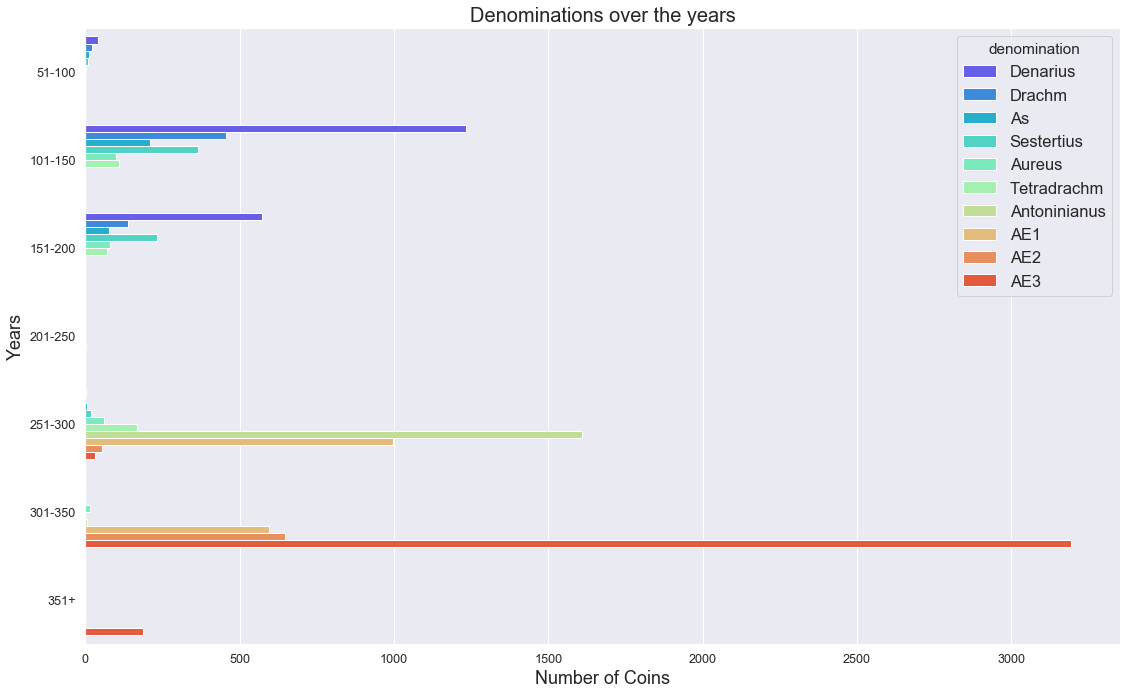

In [13]:
bins = [50, 100, 150, 200, 250, 300, 350, 400]
bin_labels = ['51-100','101-150','151-200','201-250','251-300','301-350', '351+']
df['years_bins'] = pd.cut(df['year'],bins = bins, labels=bin_labels,include_lowest=True)

df_temp = df[df.groupby('denomination')['denomination'].transform('size')>250]
denominations_df = pd.DataFrame(df_temp.groupby('years_bins')['denomination'].value_counts())
denominations_df.columns = ['counts']
denominations_df.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(16,10))
sns.set(font_scale = 1.5)
a = sns.barplot(y=denominations_df['years_bins'],
            x=denominations_df['counts'],
            hue=denominations_df['denomination'],
            ax=ax,
               palette='rainbow');

ax.set_title('Denominations over the years', fontsize=20)
ax.set_ylabel('Years',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
plt.tight_layout()

# Loss curves

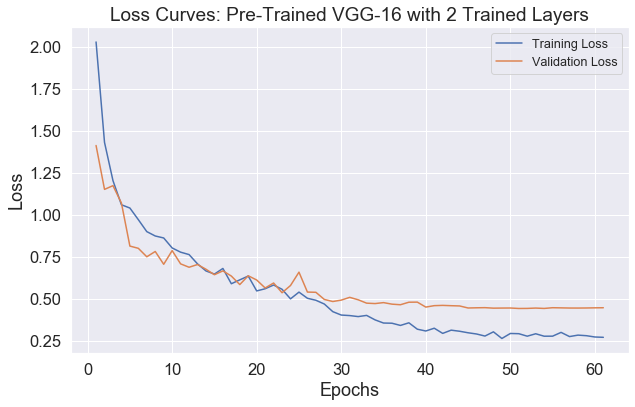

In [14]:
fig, ax= plt.subplots(figsize=(10,6))
plot_helper.loss_plotter(history, ax=ax)

# Accuracy curves

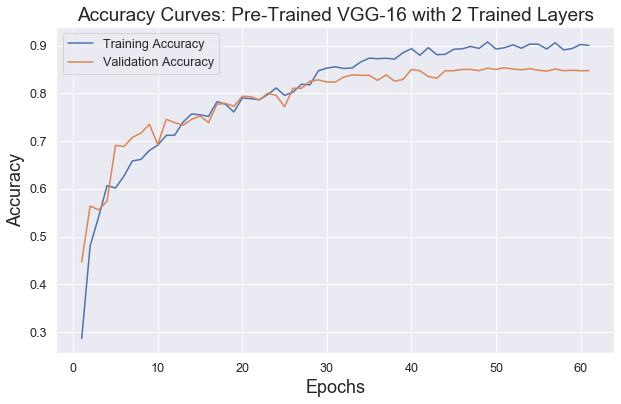

In [15]:
fig, ax= plt.subplots(figsize=(10,6))
plot_helper.acc_plotter(history, ax=ax)

# Confusion matrix

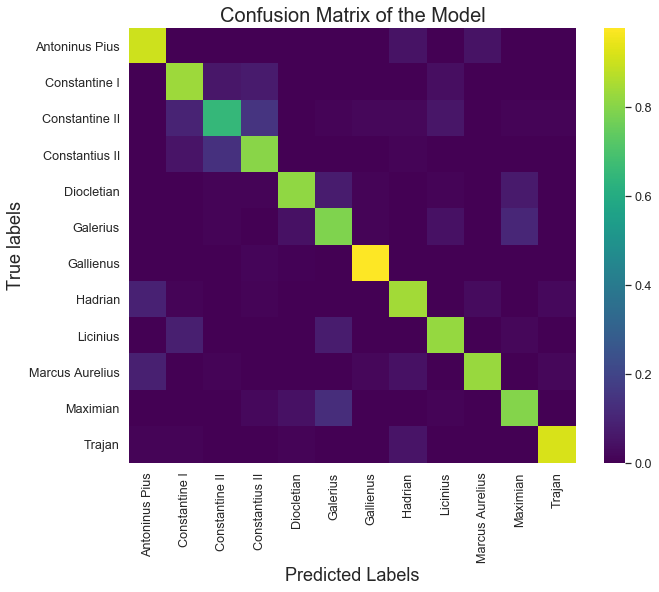

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
plot_helper.cm_plotter(predictions, ax=ax)